<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import numpy as np
import chart_studio
import sympy as sym
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py

from sympy import *

sns.set_style("white")
chart_studio.tools.set_config_file(world_readable = True, sharing = 'public')

<div class="alert alert-block alert-info">
<b>Create symbol</b>
</div>

In [2]:
x = sym.Symbol('x')

<div class="alert alert-block alert-info">
<b>Create a function, take the derivative and create the x range values</b>
</div>

In [3]:
f = 3*x**2 + 2*x - 1

fdiff = sym.diff(f, x, 1)

fx = lambdify(x, f, modules = ['numpy'])

fxdiff = lambdify(x, fdiff, modules = ['numpy'])

xvals = np.linspace(-10, 10, 20)

In [4]:
# Function results
fx(xvals).min()

-1.2216066481994452

In [5]:
# Derivative results
fxdiff(xvals)

array([-58.        , -51.68421053, -45.36842105, -39.05263158,
       -32.73684211, -26.42105263, -20.10526316, -13.78947368,
        -7.47368421,  -1.15789474,   5.15789474,  11.47368421,
        17.78947368,  24.10526316,  30.42105263,  36.73684211,
        43.05263158,  49.36842105,  55.68421053,  62.        ])

In [6]:
equation = Eq(fdiff, 0)

print('First derivative equals 0:')
display(equation)
print('This is the x value(s) that solve the problem:')
display(sym.solveset(equation, x))

First derivative equals 0:


Eq(6*x + 2, 0)

This is the x value(s) that solve the problem:


FiniteSet(-1/3)

<div class="alert alert-block alert-info">
<b>Plot both the function and their derivative (Matplotlib)</b>
</div>

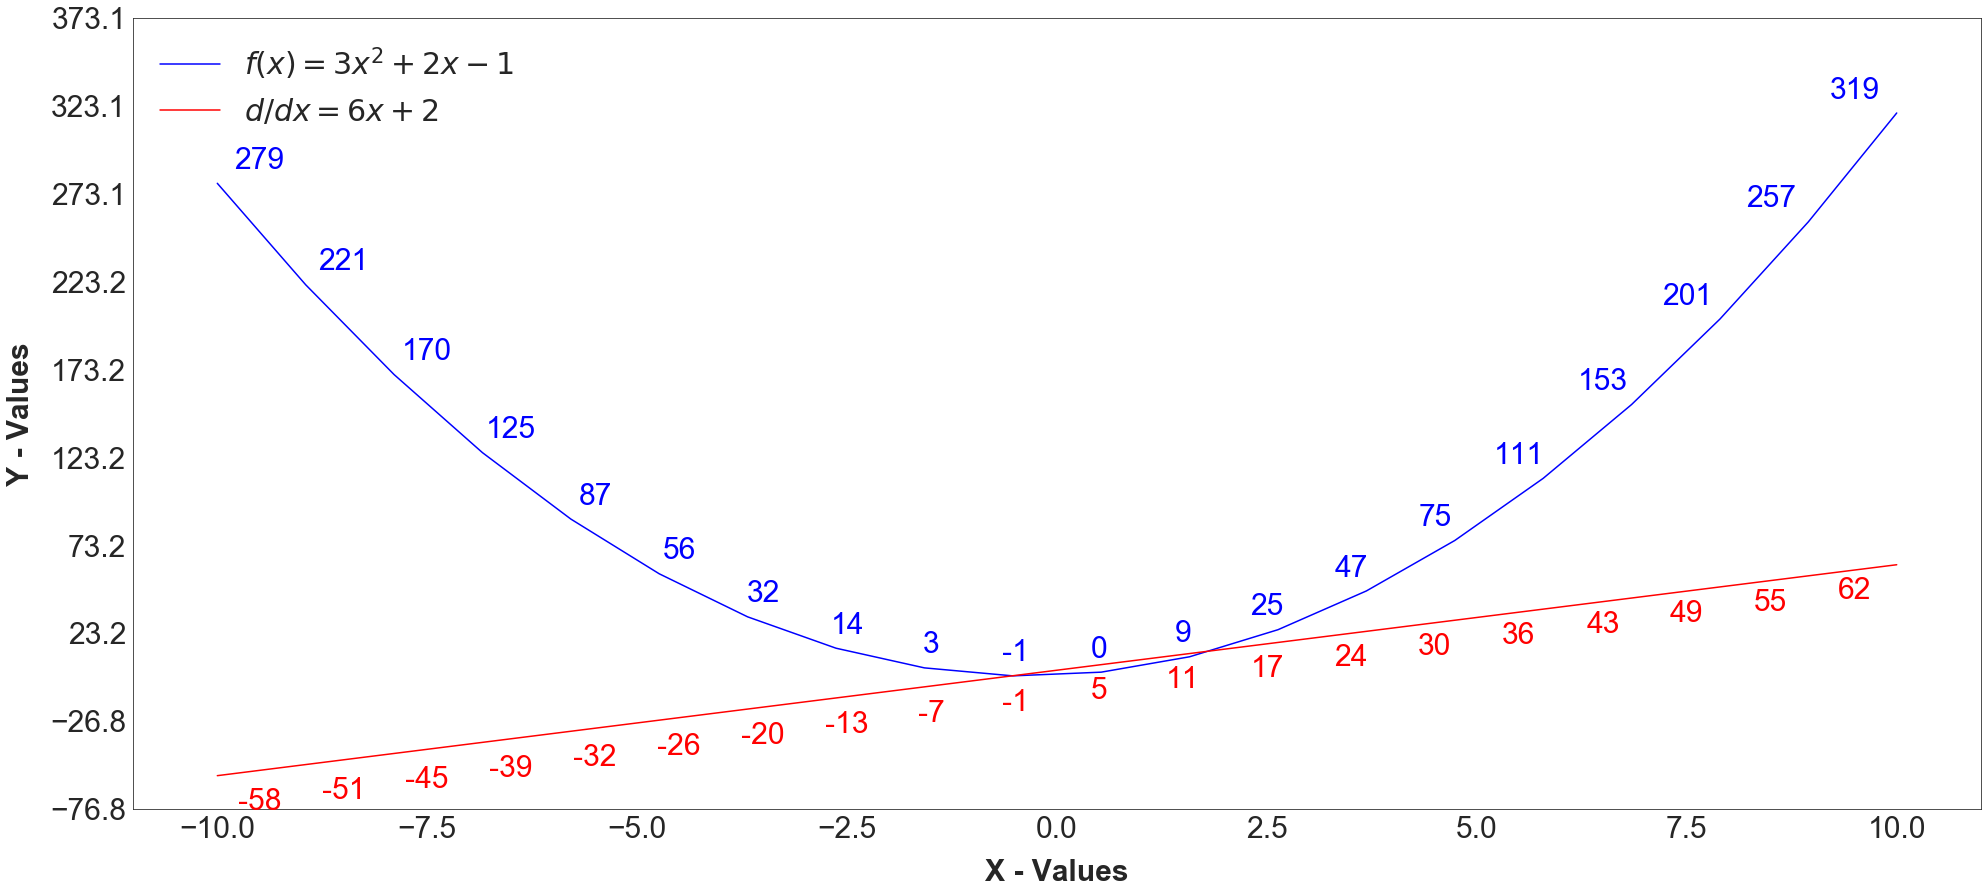

In [7]:
plt.figure(figsize = (30,15))
plt.rc('font', weight = 'normal') 
plt.xlabel('X - Values', weight = 'bold', fontsize = 30, labelpad = 15)
plt.ylabel('Y - Values', weight = 'bold', fontsize = 30,  labelpad = 15)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)                       
plt.tight_layout(pad = 10) 
plt.plot(xvals, fx(xvals), label = r'$f(x) = 3x^2 + 2x - 1$', color = 'blue')
plt.plot(xvals, fxdiff(xvals), label = r'$d/dx = 6x + 2$', color = 'red')
plt.legend(loc = 'upper left', prop = {'size':30}, frameon = False)

for i, v in enumerate(fx(xvals)):
    plt.text(i-9.5, v+5, "%d" %v, va = 'bottom', ha = 'center', 
             color = 'blue',fontsize = 30)
    
for i, v in enumerate(fxdiff(xvals)):
    plt.text(i-9.5, v-15, "%d" %v, va = 'center', ha = 'center', 
             color = 'red',fontsize = 30)
    
xstart, xend = plt.xlim()
ystart, yend = plt.ylim()
plt.yticks(np.arange(ystart, yend+50, 50))
plt.show()

<div class="alert alert-block alert-info">
<b>Plot both the function and their derivative (Plotly)</b>
</div>

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = xvals, y = fx(xvals), 
    name = 'Function',
    mode = 'lines', 
    hoverinfo = 'x+y'))

fig.add_trace(go.Scatter(x = xvals, y = fxdiff(xvals), 
    name = 'Derivative',
    mode = 'lines', 
    hoverinfo = 'x+y'))

fig.update_layout(legend = dict(
    x = .0, y = 1.2),
    xaxis_title = 'X - Values',
    yaxis_title = 'Y - Values',
    paper_bgcolor = 'rgba(1,1,1,1)',
    plot_bgcolor = 'rgba(255,255,255,255)',
    hovermode = 'x unified',
    hoverlabel = dict(
    font_size = 15, 
    font_family = 'Helvetica'),
    font = dict(
    family = 'Helvetica, Helvetica',
    size = 15,
    color = 'white'))

fig.add_annotation(text = r'$f(x) = 3x^2 + 2x - 1$',
                  xref = 'paper', yref = 'paper', 
                  font = dict(size = 15, 
                  family = 'Helvetica',
                  color = 'black'),
                  x = 0.04, y = 0.9, showarrow = False)

fig.add_annotation(text = r'$d/dx = 6x + 2$',
                  xref = 'paper', yref = 'paper',
                  font = dict(size = 15, 
                  family = 'Helvetica',
                  color = 'black'),
                  x = 0.04, y = 0.05, showarrow = False)

fig.update_xaxes(tickformat = '.0f',
                 hoverformat = '.3f', 
                 dtick = 2, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range = [-10, 10])

fig.update_yaxes(tickformat = '.0f',
                 hoverformat = '.3f',
                 dtick = 50, 
                 ticks = 'outside', 
                 tickwidth = 2, 
                 tickcolor = 'black', 
                 ticklen = 10,
                 showgrid = False,
                 zeroline = False,
                 range = [fxdiff(xvals).min(), fx(xvals).max()]) # in this case is unnecessary

py.iplot(fig, filename = 'Plotting differentiation', auto_open = False)